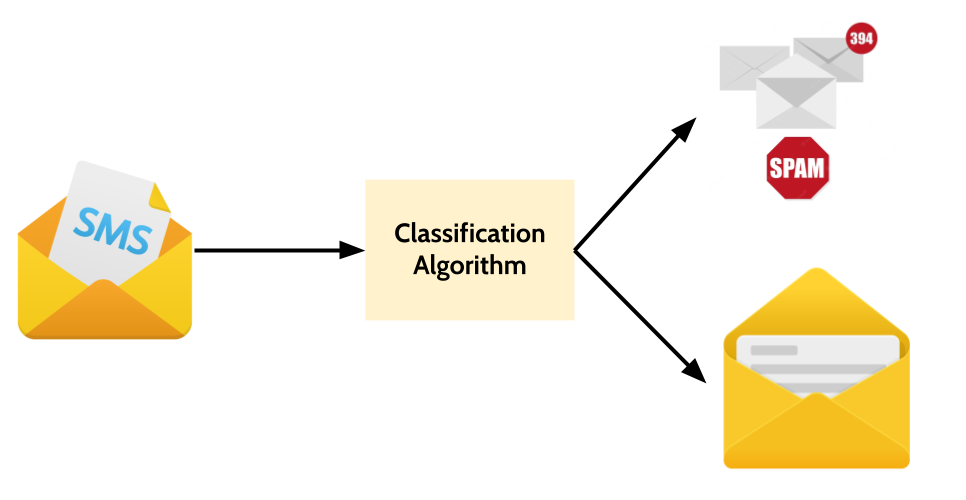

# Spam Comment Detection

### Here I've create a spam comment detection model using NLTK. 

To maintain communication channels safe and secure, spam detection is the act of identifying and filtering out undesired or irrelevant messages, such as spam email or online comments. This is accomplished through collaborative filtering, content analysis, sender reputation  checks, machine learning, heuristics, blacklists, and whitelists in addition to behavioral analysis and heuristics. The fight against spammers'  constant adaptation of their strategies to get past filters is never-ending.

#### Why need Spam Detection?

##### 1. Filters away undesirable and irrelevant messages to keep inboxes and communication channels clear of clutter. clutter-free.

##### 2. Phishing schemes, fraud, and dangerous content that can harm people and businesses are prevented.

##### 3. Privacy Protection: Prevents sensitive and private information from slipping into the wrong hands.

##### 4. Save Time: Saves time by making certain that users only see and respond to genuine and important messages.

##### 5. Enhance Security: By filtering out potentially hazardous content, email and communication systems become more secure.

##### 6. Maintain Reputation: By avoiding the association of their messages with spam, this feature aids in maintaining the reputation of senders and organizations.

##### 7. Enhance User Experience: By eliminating the aggravation and distractions brought on by spam, a more enjoyable and effective user experience is created.


## Use approach for this project

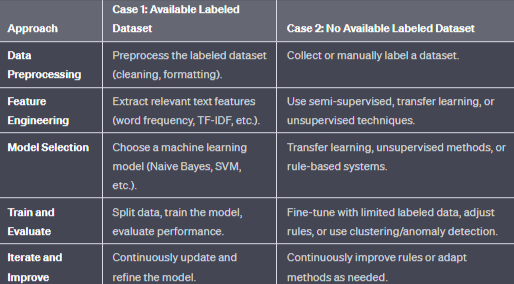

# Build model with given labeled dataset

## 1. Import required liberires

In [1]:
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## 2. Download NLTK stopword's pakage

In [2]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

## 3. Load your labeled dataset

### 3.1 The dataset should have columns: 'text' and 'label' (0 for not spam, 1 for spam)

In [3]:
try:
    data = pd.read_csv("spam.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 decoding fails, try a different encoding (e.g., Latin-1)
    data = pd.read_csv("spam.csv", encoding="latin-1")

## 4. Drop unrequired column & rename the column names

In [4]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1': 'Label', 'v2': 'Text'})

## 5. Text preprocessing with NLTK

In [5]:
stopwords = set(nltk.corpus.stopwords.words("english"))

## 6. Preprocess function our labeled data

In [6]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Tokenize and remove stopwords
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords]
    return " ".join(words)

## 7. Apply function for "TEXT" column

In [7]:
data['Text'] = data['Text'].apply(preprocess_text)

## 8. Feature extraction using TF-IDF

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Text'])
y = data['Label']

## 9. Split data into train and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 10. Train a Logistic Regression classifier


In [10]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

## 11. Now Predictions time

In [11]:
y_pred = clf.predict(X_test)

## 12. Model evaluation (Model analysis)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


## 13. Classifier report for our model prediction

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.97      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## 14. Feature Importance (Top words contributing to spam classification)

In [14]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coef = clf.coef_[0]
top_spam_words = [feature_names[i] for i in coef.argsort()[-10:]]
print("Top words contributing to spam classification:", top_spam_words)

Top words contributing to spam classification: ['text', 'uk', 'reply', 'stop', 'www', 'call', 'free', 'mobile', 'claim', 'txt']


## 15. Create a main function for prediction

In [15]:
def analyze_input(input_text):
    # Preprocess the input text
    input_text = preprocess_text(input_text)
    
    # Transform the input using the trained TF-IDF vectorizer
    input_vector = tfidf_vectorizer.transform([input_text])
    
    # Predict whether the input is spam or not
    prediction = clf.predict(input_vector)[0]
    
    # Count the total words in the input
    total_words = len(nltk.word_tokenize(input_text))
    
    # Count the number of spam words in the input (words that contributed to spam classification)
    spam_words_count = sum(1 for word in nltk.word_tokenize(input_text) if word in top_spam_words)
    
    # Calculate the percentage of spam words in the input
    percentage_spam = (spam_words_count / total_words) * 100
    
    # Provide an explanation for the classification
    if prediction == 0:
        explanation = "Not spam"
        color = "\033[92m"  # Green color
        emoji = "😃"  # Happy emoji
    else:
        explanation = "Spam"
        color = "\033[91m"  # Red color
        emoji = "😞"  # Sad emoji
    
    # Reset text formatting
    reset_format = "\033[0m"
    
    # Prepare the formatted explanation with emoji
    formatted_explanation = f"{color}\033[3m{explanation} {emoji}{reset_format}"
    
    # Prepare the result dictionary
    result = {
        "input_text": input_text,
        "total_words": total_words,
        "spam_words_count": spam_words_count,
        "percentage_spam": percentage_spam,
        "classification": formatted_explanation,
        "color": color
    }
    
    return result

## 16. User input

In [16]:
user_input = "My Grandfather smoked his whole life. I was about 10 years old when my mother said to him, 'If you ever want to see your grandchildren graduate, you have to stop immediately.'. Tears welled up in his eyes when he realized what exactly was at stake. He gave it up immediately. Three years later he died of lung cancer. It was really sad and destroyed me. My mother said to me- 'Don't ever smoke. Please don't put your family through what your Grandfather put us through. I agreed. At 28, I have never touched a cigarette. I must say, I feel a very slight sense of regret for never having done it, because your post gave me cancer anyway."

## 17. Finally we've reach the result

In [17]:
result = analyze_input(user_input)
print("\033[1mAnalysis Results:\033[0m")  # Bold text
print("\033[3mComplete Input Text:\033[0m", result["input_text"])  # Italics text
print("\033[3mTotal Words:\033[0m", result["total_words"])  # Italics text
print("\033[3mSpam Words Count:\033[0m", result["spam_words_count"])  # Italics text
print("\033[3mPercentage of Spam:\033[0m", result["percentage_spam"])  # Italics text
print("\033[3mClassification:\033[0m", result["classification"])  # Italics text and colored with emoji

Analysis Results:
Complete Input Text: grandfather smoked whole life years old mother said ever want see grandchildren graduate stop immediately tears welled eyes realized exactly stake gave immediately three years later died lung cancer really sad destroyed mother said ever smoke please put family grandfather put us agreed never touched cigarette must say feel slight sense regret never done post gave cancer anyway
Total Words: 58
Spam Words Count: 1
Percentage of Spam: 1.7241379310344827
Classification: Spam 😞
